# Importing Libraries

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import arange
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [2]:
import tensorflow.keras
from keras.models import Sequential
# The NN will be built layer by layer
from keras.layers import Dense
# The model will result with a fully connected multi-layered neural network

### Setting up the variables for the dataset

In [3]:
x_variable = []
Pe_variable = []
u_variable = []

# Using x and y to compute Pe
for x in np.linspace(0, 1, 1001):
    for Pe in np.linspace(0.1, 1, 10):
        u_n = np.exp(Pe * x) - np.exp(Pe)
        u_d = 1 - Pe - np.exp(Pe)
        u = u_n / u_d
    
        x_variable.append(x)
        Pe_variable.append(Pe)
        u_variable.append(u)
    
# Creating dataset
analytical = pd.DataFrame({'x' : x_variable, 'Pe' : Pe_variable, 'u' : u_variable})
print(analytical)

         x   Pe         u
0      0.0  0.1  0.512601
1      0.0  0.2  0.525395
2      0.0  0.3  0.538361
3      0.0  0.4  0.551481
4      0.0  0.5  0.564733
...    ...  ...       ...
10005  1.0  0.6 -0.000000
10006  1.0  0.7 -0.000000
10007  1.0  0.8 -0.000000
10008  1.0  0.9 -0.000000
10009  1.0  1.0 -0.000000

[10010 rows x 3 columns]


### Create and Save CSV

In [4]:
analytical.to_csv('asmt_4.csv', index = False)

In [5]:
X = analytical.drop('u', axis = 1).values
print(x)

y = analytical['u'].values.reshape(-1,1)
print(y)

1.0
[[ 0.51260149]
 [ 0.52539466]
 [ 0.53836126]
 ...
 [-0.        ]
 [-0.        ]
 [-0.        ]]


### Checking out the Correlation Matrix Heatmap

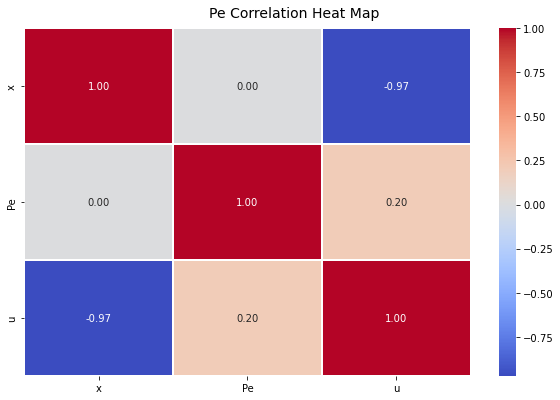

In [6]:
# Correlation Matrix with HeatMap
f, ax = plt.subplots(figsize=(10, 6))
corr = analytical.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Pe Correlation Heat Map', fontsize=14)
f.savefig('heatmap.png')

## Training the model with various activation layers and optimizers

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## 3 Layers, activation = relu, relu, linear

In [8]:
# Model Training
mod = Sequential()
mod.add(
    Dense(5, input_dim=2, activation='relu'))
mod.add(
    Dense(3, activation = 'relu'))
mod.add(
    Dense(1, activation = 'linear'))

mod.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


## Optimizer = Adam

In [9]:
mod.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics=['accuracy'])

In [10]:
epoch_h = mod.fit(X_train, y_train, epochs = 25, batch_size = 20, validation_split =0.2)

Epoch 1/25
321/321 [==============================] - 1s 1ms/step - loss: 0.0140 - accuracy: 6.2441e-04 - val_loss: 0.0063 - val_accuracy: 0.0019
Epoch 2/25
321/321 [==============================] - 0s 893us/step - loss: 0.0031 - accuracy: 6.2441e-04 - val_loss: 8.9537e-04 - val_accuracy: 0.0019
Epoch 3/25
321/321 [==============================] - 0s 1ms/step - loss: 4.9088e-04 - accuracy: 6.2441e-04 - val_loss: 3.4135e-04 - val_accuracy: 0.0019
Epoch 4/25
321/321 [==============================] - 0s 991us/step - loss: 3.0397e-04 - accuracy: 6.2441e-04 - val_loss: 3.1078e-04 - val_accuracy: 0.0019
Epoch 5/25
321/321 [==============================] - 0s 1ms/step - loss: 2.9166e-04 - accuracy: 6.2441e-04 - val_loss: 3.1382e-04 - val_accuracy: 0.0019
Epoch 6/25
321/321 [==============================] - 0s 857us/step - loss: 2.8678e-04 - accuracy: 6.2441e-04 - val_loss: 2.9779e-04 - val_accuracy: 0.0019
Epoch 7/25
321/321 [==============================] - 0s 859us/step - loss: 2.8546

In [11]:
# Model evaluation
epoch_h.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plotting the model results

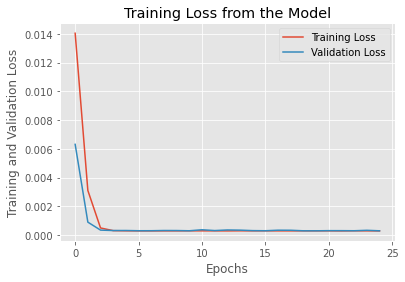

In [15]:
# Plotting Model Loss
plt.plot(epoch_h.history['loss'])
plt.plot(epoch_h.history['val_loss'])
plt.title("Training Loss from the Model")
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.style.use('ggplot')

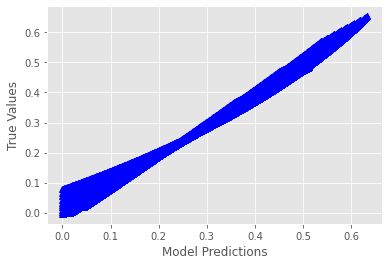

In [16]:
# Analytical Testing
y_predict = mod.predict(X)
plt.plot(y, y_predict, '^', color = 'b')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.style.use('ggplot')

## Optimizer = SGD

In [17]:
mod.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics=['accuracy'])
epoch_h = mod.fit(X_train, y_train, epochs = 25, batch_size = 20, validation_split =0.2)

Epoch 1/25
321/321 [==============================] - 1s 1ms/step - loss: 2.8306e-04 - accuracy: 6.2441e-04 - val_loss: 3.2180e-04 - val_accuracy: 0.0019
Epoch 2/25
321/321 [==============================] - 0s 1ms/step - loss: 2.8650e-04 - accuracy: 6.2441e-04 - val_loss: 3.1355e-04 - val_accuracy: 0.0019
Epoch 3/25
321/321 [==============================] - 0s 889us/step - loss: 2.8391e-04 - accuracy: 6.2441e-04 - val_loss: 3.1917e-04 - val_accuracy: 0.0019
Epoch 4/25
321/321 [==============================] - 0s 1ms/step - loss: 2.9073e-04 - accuracy: 6.2441e-04 - val_loss: 2.9195e-04 - val_accuracy: 0.0019
Epoch 5/25
321/321 [==============================] - 0s 1ms/step - loss: 2.8525e-04 - accuracy: 6.2441e-04 - val_loss: 3.1965e-04 - val_accuracy: 0.0019
Epoch 6/25
321/321 [==============================] - 0s 881us/step - loss: 2.8314e-04 - accuracy: 6.2441e-04 - val_loss: 2.9364e-04 - val_accuracy: 0.0019
Epoch 7/25
321/321 [==============================] - 0s 885us/step - lo

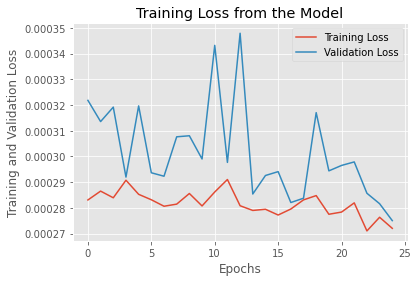

In [18]:
# Plotting Model Loss
plt.plot(epoch_h.history['loss'])
plt.plot(epoch_h.history['val_loss'])
plt.title("Training Loss from the Model")
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.style.use('ggplot')

## 3 Layers: sigmoid, relu, linear

In [19]:
# Model Training
mod1 = Sequential()
mod1.add(
    Dense(5, input_dim=2, activation='sigmoid'))
mod1.add(
    Dense(3, activation = 'relu'))
mod1.add(
    Dense(1, activation = 'linear'))

mod1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 15        
                                                                 
 dense_4 (Dense)             (None, 3)                 18        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


### Optimizer = Adam

In [20]:
mod1.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics=['accuracy'])

In [21]:
epoch_h1 = mod1.fit(X_train, y_train, epochs = 25, batch_size = 20, validation_split =0.2)

Epoch 1/25
321/321 [==============================] - 1s 1ms/step - loss: 0.4447 - accuracy: 6.2441e-04 - val_loss: 0.0566 - val_accuracy: 0.0019
Epoch 2/25
321/321 [==============================] - 0s 896us/step - loss: 0.0315 - accuracy: 6.2441e-04 - val_loss: 0.0241 - val_accuracy: 0.0019
Epoch 3/25
321/321 [==============================] - 0s 1ms/step - loss: 0.0184 - accuracy: 6.2441e-04 - val_loss: 0.0140 - val_accuracy: 0.0019
Epoch 4/25
321/321 [==============================] - 0s 1ms/step - loss: 0.0100 - accuracy: 6.2441e-04 - val_loss: 0.0070 - val_accuracy: 0.0019
Epoch 5/25
321/321 [==============================] - 0s 865us/step - loss: 0.0047 - accuracy: 6.2441e-04 - val_loss: 0.0032 - val_accuracy: 0.0019
Epoch 6/25
321/321 [==============================] - 0s 863us/step - loss: 0.0023 - accuracy: 6.2441e-04 - val_loss: 0.0017 - val_accuracy: 0.0019
Epoch 7/25
321/321 [==============================] - 0s 859us/step - loss: 0.0014 - accuracy: 6.2441e-04 - val_loss: 

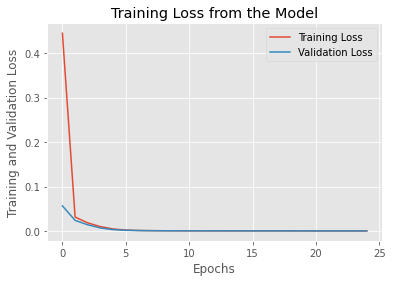

In [22]:
# Plotting Model Loss
plt.plot(epoch_h1.history['loss'])
plt.plot(epoch_h1.history['val_loss'])
plt.title("Training Loss from the Model")
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.style.use('ggplot')

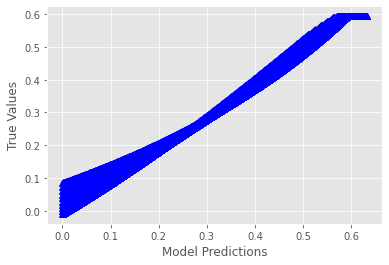

In [23]:
# Analytical Testing
y_predict = mod1.predict(X)
plt.plot(y, y_predict, '^', color = 'b')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.style.use('ggplot')

## Optimizer = SGD

In [24]:
mod1.compile(optimizer = 'SGD', loss = 'mean_squared_error', metrics=['accuracy'])
epoch_h1 = mod1.fit(X_train, y_train, epochs = 25, batch_size = 20, validation_split =0.2)

Epoch 1/25
321/321 [==============================] - 1s 1ms/step - loss: 3.2304e-04 - accuracy: 6.2441e-04 - val_loss: 3.4800e-04 - val_accuracy: 0.0019
Epoch 2/25
321/321 [==============================] - 0s 912us/step - loss: 3.2309e-04 - accuracy: 6.2441e-04 - val_loss: 3.4921e-04 - val_accuracy: 0.0019
Epoch 3/25
321/321 [==============================] - 0s 1ms/step - loss: 3.2272e-04 - accuracy: 6.2441e-04 - val_loss: 3.4960e-04 - val_accuracy: 0.0019
Epoch 4/25
321/321 [==============================] - 0s 1ms/step - loss: 3.2189e-04 - accuracy: 6.2441e-04 - val_loss: 3.4742e-04 - val_accuracy: 0.0019
Epoch 5/25
321/321 [==============================] - 0s 1ms/step - loss: 3.2198e-04 - accuracy: 6.2441e-04 - val_loss: 3.5901e-04 - val_accuracy: 0.0019
Epoch 6/25
321/321 [==============================] - 0s 1ms/step - loss: 3.2246e-04 - accuracy: 6.2441e-04 - val_loss: 3.4663e-04 - val_accuracy: 0.0019
Epoch 7/25
321/321 [==============================] - 0s 1ms/step - loss: 

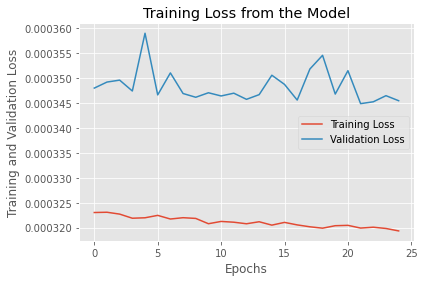

In [25]:
# Plotting Model Loss
plt.plot(epoch_h1.history['loss'])
plt.plot(epoch_h1.history['val_loss'])
plt.title("Training Loss from the Model")
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.style.use('ggplot')

## 3 Layers: sigmoid, sigmoid, linear

In [26]:
# Model Training
mod2 = Sequential()
mod2.add(
    Dense(5, input_dim=2, activation='sigmoid'))
mod2.add(
    Dense(3, activation = 'sigmoid'))
mod2.add(
    Dense(1, activation = 'linear'))

mod2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 15        
                                                                 
 dense_7 (Dense)             (None, 3)                 18        
                                                                 
 dense_8 (Dense)             (None, 1)                 4         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


## Optimizer: Adam

In [27]:
mod2.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics=['accuracy'])
epoch_h2 = mod2.fit(X_train, y_train, epochs = 25, batch_size = 20, validation_split =0.2)

Epoch 1/25
321/321 [==============================] - 1s 1ms/step - loss: 0.1568 - accuracy: 6.2441e-04 - val_loss: 0.0363 - val_accuracy: 0.0019
Epoch 2/25
321/321 [==============================] - 0s 891us/step - loss: 0.0337 - accuracy: 6.2441e-04 - val_loss: 0.0325 - val_accuracy: 0.0019
Epoch 3/25
321/321 [==============================] - 0s 947us/step - loss: 0.0308 - accuracy: 6.2441e-04 - val_loss: 0.0294 - val_accuracy: 0.0019
Epoch 4/25
321/321 [==============================] - 0s 1ms/step - loss: 0.0274 - accuracy: 6.2441e-04 - val_loss: 0.0255 - val_accuracy: 0.0019
Epoch 5/25
321/321 [==============================] - 0s 924us/step - loss: 0.0226 - accuracy: 6.2441e-04 - val_loss: 0.0197 - val_accuracy: 0.0019
Epoch 6/25
321/321 [==============================] - 0s 916us/step - loss: 0.0157 - accuracy: 6.2441e-04 - val_loss: 0.0118 - val_accuracy: 0.0019
Epoch 7/25
321/321 [==============================] - 0s 1ms/step - loss: 0.0080 - accuracy: 6.2441e-04 - val_loss: 

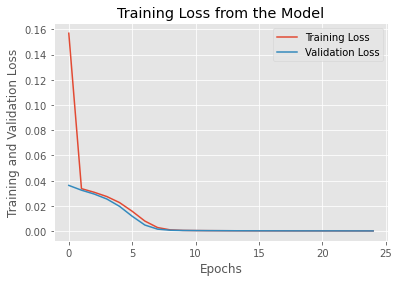

In [28]:
# Plotting Model Loss
plt.plot(epoch_h2.history['loss'])
plt.plot(epoch_h2.history['val_loss'])
plt.title("Training Loss from the Model")
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.style.use('ggplot')

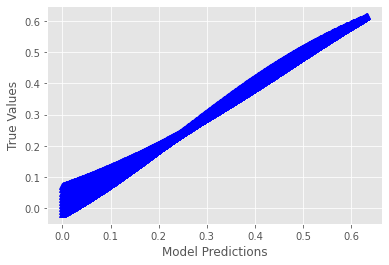

In [29]:
# Analytical Testing
y_predict = mod2.predict(X)
plt.plot(y, y_predict, '^', color = 'b')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.style.use('ggplot')

## Optimizer: SGD

In [30]:
mod2.compile(optimizer = 'SGD', loss = 'mean_squared_error', metrics=['accuracy'])
epoch_h2 = mod2.fit(X_train, y_train, epochs = 25, batch_size = 20, validation_split =0.2)

Epoch 1/25
321/321 [==============================] - 1s 1ms/step - loss: 1.7199e-04 - accuracy: 6.2441e-04 - val_loss: 1.8352e-04 - val_accuracy: 0.0019
Epoch 2/25
321/321 [==============================] - 0s 904us/step - loss: 1.7193e-04 - accuracy: 6.2441e-04 - val_loss: 1.8325e-04 - val_accuracy: 0.0019
Epoch 3/25
321/321 [==============================] - 0s 829us/step - loss: 1.7187e-04 - accuracy: 6.2441e-04 - val_loss: 1.8317e-04 - val_accuracy: 0.0019
Epoch 4/25
321/321 [==============================] - 0s 863us/step - loss: 1.7189e-04 - accuracy: 6.2441e-04 - val_loss: 1.8313e-04 - val_accuracy: 0.0019
Epoch 5/25
321/321 [==============================] - 0s 969us/step - loss: 1.7174e-04 - accuracy: 6.2441e-04 - val_loss: 1.8325e-04 - val_accuracy: 0.0019
Epoch 6/25
321/321 [==============================] - 0s 1ms/step - loss: 1.7172e-04 - accuracy: 6.2441e-04 - val_loss: 1.8305e-04 - val_accuracy: 0.0019
Epoch 7/25
321/321 [==============================] - 0s 1ms/step - 

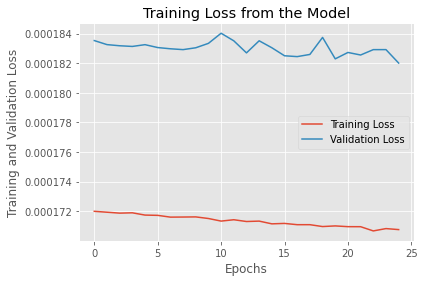

In [31]:
# Plotting Model Loss
plt.plot(epoch_h2.history['loss'])
plt.plot(epoch_h2.history['val_loss'])
plt.title("Training Loss from the Model")
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.style.use('ggplot')

## 3 Layers: sofmax, softmax, linear

In [32]:
# Model Training
mod3 = Sequential()
mod3.add(
    Dense(5, input_dim=2, activation='softmax'))
mod3.add(
    Dense(3, activation = 'softmax'))
mod3.add(
    Dense(1, activation = 'linear'))

mod3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 5)                 15        
                                                                 
 dense_10 (Dense)            (None, 3)                 18        
                                                                 
 dense_11 (Dense)            (None, 1)                 4         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


## Optimizer: Adam

In [33]:
mod3.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics=['accuracy'])
epoch_h3 = mod3.fit(X_train, y_train, epochs = 25, batch_size = 20, validation_split =0.2)

Epoch 1/25
321/321 [==============================] - 1s 1ms/step - loss: 0.1011 - accuracy: 6.2441e-04 - val_loss: 0.0329 - val_accuracy: 0.0019
Epoch 2/25
321/321 [==============================] - 0s 990us/step - loss: 0.0309 - accuracy: 6.2441e-04 - val_loss: 0.0298 - val_accuracy: 0.0019
Epoch 3/25
321/321 [==============================] - 0s 889us/step - loss: 0.0278 - accuracy: 6.2441e-04 - val_loss: 0.0258 - val_accuracy: 0.0019
Epoch 4/25
321/321 [==============================] - 0s 1ms/step - loss: 0.0216 - accuracy: 6.2441e-04 - val_loss: 0.0166 - val_accuracy: 0.0019
Epoch 5/25
321/321 [==============================] - 0s 1ms/step - loss: 0.0103 - accuracy: 6.2441e-04 - val_loss: 0.0049 - val_accuracy: 0.0019
Epoch 6/25
321/321 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 6.2441e-04 - val_loss: 7.9823e-04 - val_accuracy: 0.0019
Epoch 7/25
321/321 [==============================] - 0s 980us/step - loss: 5.3807e-04 - accuracy: 6.2441e-04 - val_

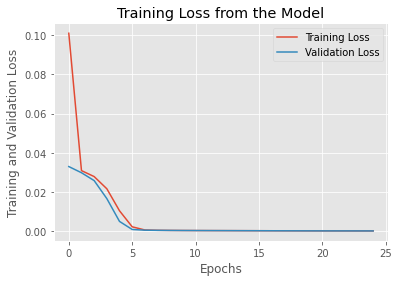

In [34]:
# Plotting Model Loss
plt.plot(epoch_h3.history['loss'])
plt.plot(epoch_h3.history['val_loss'])
plt.title("Training Loss from the Model")
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.style.use('ggplot')

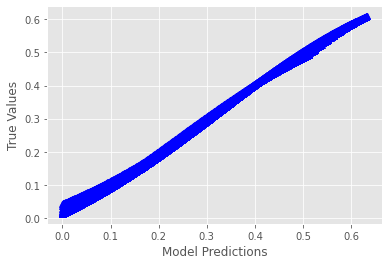

In [35]:
# Analytical Testing
y_predict = mod3.predict(X)
plt.plot(y, y_predict, '^', color = 'b')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.style.use('ggplot')

## Optimizer: SGD

In [36]:
mod3.compile(optimizer = 'SGD', loss = 'mean_squared_error', metrics=['accuracy'])
epoch_h3 = mod3.fit(X_train, y_train, epochs = 25, batch_size = 20, validation_split =0.2)

Epoch 1/25
321/321 [==============================] - 1s 1ms/step - loss: 6.0738e-05 - accuracy: 6.2441e-04 - val_loss: 6.2929e-05 - val_accuracy: 0.0019
Epoch 2/25
321/321 [==============================] - 0s 858us/step - loss: 6.0453e-05 - accuracy: 6.2441e-04 - val_loss: 6.2566e-05 - val_accuracy: 0.0019
Epoch 3/25
321/321 [==============================] - 0s 885us/step - loss: 6.0298e-05 - accuracy: 6.2441e-04 - val_loss: 6.2227e-05 - val_accuracy: 0.0019
Epoch 4/25
321/321 [==============================] - 0s 867us/step - loss: 6.0160e-05 - accuracy: 6.2441e-04 - val_loss: 6.2034e-05 - val_accuracy: 0.0019
Epoch 5/25
321/321 [==============================] - 0s 869us/step - loss: 6.0070e-05 - accuracy: 6.2441e-04 - val_loss: 6.1964e-05 - val_accuracy: 0.0019
Epoch 6/25
321/321 [==============================] - 0s 839us/step - loss: 6.0022e-05 - accuracy: 6.2441e-04 - val_loss: 6.1864e-05 - val_accuracy: 0.0019
Epoch 7/25
321/321 [==============================] - 0s 884us/ste

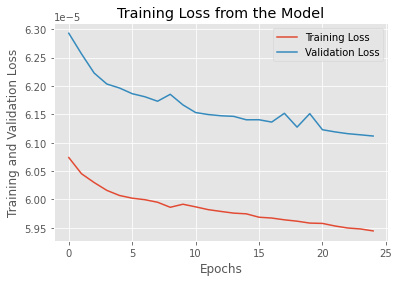

In [37]:
# Plotting Model Loss
plt.plot(epoch_h3.history['loss'])
plt.plot(epoch_h3.history['val_loss'])
plt.title("Training Loss from the Model")
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.style.use('ggplot')

## Hyperparameter Tuning

## KNN Algorithm tuning

In [41]:

num_folds = 10
seed =7
scoring = 'neg_mean_squared_error'
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.000000 using {'n_neighbors': 3}
-0.000000 (0.000000) with: {'n_neighbors': 1}
-0.000000 (0.000000) with: {'n_neighbors': 3}
-0.000000 (0.000000) with: {'n_neighbors': 5}
-0.000000 (0.000000) with: {'n_neighbors': 7}
-0.000000 (0.000000) with: {'n_neighbors': 9}
-0.000000 (0.000000) with: {'n_neighbors': 11}
-0.000001 (0.000000) with: {'n_neighbors': 13}
-0.000001 (0.000000) with: {'n_neighbors': 15}
-0.000001 (0.000000) with: {'n_neighbors': 17}
-0.000001 (0.000000) with: {'n_neighbors': 19}
-0.000001 (0.000000) with: {'n_neighbors': 21}


## Now lets finalize a model with the results we got so far and apply it on the test set..


In [42]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = KNeighborsRegressor(n_neighbors=3)
model.fit(rescaledX, y_train)

# transform the test dataset
rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)
print(mean_squared_error(y_test, predictions))

2.0140921619043295e-07


#### Looking at the different models, changing the types of layers did not vary much from each model. Only when I changed the last layer from linear did the model drastically changed and created more loss.  Optimizer choices between Adam and SGD showed a significant difference. Adam displayed much less loss compared to SGD. Lastly, after hyperparameter tuning the model, there was not much improvement over the original model.